<a href="https://colab.research.google.com/github/Somcodo4/Real-Time-hands-on-Projects-/blob/main/Project_MobileNetV2_Animal_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Install necessary libraries
!pip install tensorflow pillow wikipedia

In [33]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import wikipedia
from google.colab import files

In [34]:
# Load Pre-trained Model
model = MobileNetV2(weights='imagenet')

In [35]:
# Upload an image
uploaded = files.upload()



Saving download.jpeg to download.jpeg


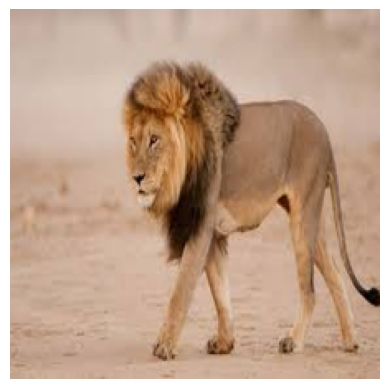

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔎 Prediction: lion (95.63999938964844%)
❗ Wikipedia page not found for: lion


In [36]:
for img_path in uploaded.keys():
    img = Image.open(img_path).resize((224, 224))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess for model
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Predict
    preds = model.predict(img_array)
    decoded_preds = decode_predictions(preds, top=1)[0]
    predicted_name = decoded_preds[0][1].replace('_', ' ')
    confidence = round(decoded_preds[0][2] * 100, 2)

    print(f"🔎 Prediction: {predicted_name} ({confidence}%)")

    # Fetch info from Wikipedia
    try:
        summary = wikipedia.summary(predicted_name, sentences=3)
        print(f"📖 Wikipedia Info:\n{summary}")
    except Exception as e:
        print("❗ Wikipedia page not found for:", predicted_name)